# Collect vaccum phase DLPNO-CCSD(T)/DFT-level ion-pair energies and compare with ISAPT.

In [1]:
import re
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import scipy as sc
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
au2kcal = 627.50957099203276

In [2]:
# Globals
pattern='FINAL SINGLE POINT ENERGY'
position=4

mols=[
    'C1L1A1',
    'C1L1A2',
    'C1L1A3',
#   'C2L1A1', 
    'C2L1A2',
    'C2L1A3',
    'C3L1A1',
    'C3L1A2',
    'C3L1A3',
    'C1L2A1',
    'C1L2A2',
    'C1L2A3',
    'C2L2A1',
    'C2L2A2',
    'C2L2A3',
    'C3L2A1',
    'C3L2A2',
    'C3L2A3',
    'C1L3A1',
    'C1L3A2',
    'C1L3A3',
    'C2L3A1',
    'C2L3A2',
    'C2L3A3',
    'C3L3A1',
    'C3L3A2',
    'C3L3A3'
]

Ctypes=np.array([
    [1,1],
    [1,2],
    [1,3],
#   [2,1],
    [2,2],
    [2,3],
    [3,1],
    [3,2],
    [3,3],
    [1,1],
    [1,2],
    [1,3],
    [2,1],
    [2,2],
    [2,3],
    [3,1],
    [3,2],
    [3,3],
    [1,1],
    [1,2],
    [1,3],
    [2,1],
    [2,2],
    [2,3],
    [3,1],
    [3,2],
    [3,3]
])

DFT=np.array([
    'DLPNOCCSDT',
    'B3LYPD3BJ_def2SVPD',
    'BLYPD3BJ_def2SVPD',
    'CAMB3LYP_def2SVPD',
    'LC_BLYP_def2SVPD',
    'LC_PBE_def2SVPD',
    'M062XD3Zero_def2SVPD',
    'PBE0D3BJ_def2SVPD',
    'PBED3BJ_def2SVPD',
    'TPSSD3BJ_def2SVPD',
    'wB97XD3_def2SVP',
    'wB97XD3_def2TZVP',
    'wB97XD3_def2SVPD',
    'wB97XD3_def2TZVPD'
])

In [3]:
def extract_E(filename):
    file = open(filename, "r")
    iline=0
    for line in file:
        if re.search(pattern, line):
            iline=iline+1
            eline=line
    if (iline < 1):
        print('ERROR: Can\'t find <',pattern,'> in ',filename)
    file.close()
    E=float( eline.split()[position] )
    return E

def calc_E_SB(mol,Ctype):
    
    dire='../'+directory+'/'+mol+'/'
    
    file_A_pos=dire+'A_pos.out'
    file_A_neg=dire+'A_neg.out'
    
    E_A_pos=extract_E(file_A_pos)
    E_A_neg=extract_E(file_A_neg)
    A=E_A_pos+E_A_neg
    
    file_B=dire+'B.out'

    B=extract_E(file_B)

    N_D=np.prod(Ctype)
    E=np.zeros(N_D)
    
    i_D=0
    
    for i_Cm in range(Ctype[1]):
        for i_Cp in range(Ctype[0]):
        
            file_C_pos=dire+'C'+str(i_Cp+1)+'_pos.out'
            file_C_neg=dire+'C'+str(i_Cm+1)+'_neg.out'
        
            E_C_pos=extract_E(file_C_pos)
            E_C_neg=extract_E(file_C_neg)        
            C=E_C_pos+E_C_neg
        
            file_D=dire+'D'+str(i_D+1)+'.out'
        
            D=extract_E(file_D)
        
            E[i_D]=((B - D) - (A - C))*au2kcal
            
            i_D=i_D+1
        
    return E

def make_csv(filename,Nrows,Ncols,Header,Values):
    
    file = open(filename, "w")

    for icol in range(Ncols):
        if icol == Ncols-1:
            file.write(Header[icol]+'\n')
        else:
            file.write(Header[icol]+',')

    for irow in range(Nrows):
        for icol in range(Ncols):
            if icol == Ncols-1:
                file.write(str(Values[icol,irow])+'\n')
            else:
                file.write(str(Values[icol,irow])+',')
    file.close() 
    
    return 1

## Ion-pair energies estimated with terminating group -CH$_3$

In [4]:
NDFT=len(DFT)
Nmol=len(mols)

Eip=np.zeros([NDFT,Nmol])
Eip_fluct=np.zeros([NDFT,Nmol])

for iDFT in range(NDFT):

    directory='IO_files_benchmark26/'+DFT[iDFT]+'/NN1'
    
    for imol in range(Nmol):
        mol=mols[imol]
        Ctype=Ctypes[imol]
        E=calc_E_SB(mol,Ctype)
        Eip[iDFT,imol]=np.mean(E)
        Eip_fluct[iDFT,imol]=np.std(E)

tmp=make_csv('../csv_files/benchmark26_term_group_1.csv',Nmol,NDFT,DFT,Eip)
tmp=make_csv('../csv_files/benchmark26_term_group_1_fluct.csv',Nmol,NDFT,DFT,Eip)

## Ion-pair energies estimated with terminating group -CH$_2$CH$_3$

In [5]:
Eip=np.zeros([NDFT,Nmol])
Eip_fluct=np.zeros([NDFT,Nmol])

for iDFT in range(NDFT):

    directory='IO_files_benchmark26/'+DFT[iDFT]+'/NN2'
    
    for imol in range(Nmol):
        mol=mols[imol]
        Ctype=Ctypes[imol]
        E=calc_E_SB(mol,Ctype)
        Eip[iDFT,imol]=np.mean(E)
        Eip_fluct[iDFT,imol]=np.std(E)

tmp=make_csv('../csv_files/benchmark26_term_group_2.csv',Nmol,NDFT,DFT,Eip)
tmp=make_csv('../csv_files/benchmark26_term_group_2_fluct.csv',Nmol,NDFT,DFT,Eip)

## Ion-pair energies estimated with terminating group -CH$_2$CH$_2$CH$_3$

In [6]:
Eip=np.zeros([NDFT,Nmol])
Eip_fluct=np.zeros([NDFT,Nmol])

for iDFT in range(NDFT):

    directory='IO_files_benchmark26/'+DFT[iDFT]+'/NN3'
    
    for imol in range(Nmol):
        mol=mols[imol]
        Ctype=Ctypes[imol]
        E=calc_E_SB(mol,Ctype)
        Eip[iDFT,imol]=np.mean(E)
        Eip_fluct[iDFT,imol]=np.std(E)

tmp=make_csv('../csv_files/benchmark26_term_group_3.csv',Nmol,NDFT,DFT,Eip)
tmp=make_csv('../csv_files/benchmark26_term_group_3_fluct.csv',Nmol,NDFT,DFT,Eip)

## Error metrics w.r.t. ISAPT

In [7]:
#benchmark26_ISAPT=pd.read_csv('../csv_files/benchmark26_ISAPT_Psi4_1.4.csv',header=0)
benchmark26_ISAPT=pd.read_csv('../csv_files/benchmark26_ISAPT_junccpvdz.csv',header=0)
benchmark26_NN1=pd.read_csv('../csv_files/benchmark26_term_group_1.csv',header=0)
benchmark26_NN2=pd.read_csv('../csv_files/benchmark26_term_group_2.csv',header=0)
benchmark26_NN3=pd.read_csv('../csv_files/benchmark26_term_group_3.csv',header=0)

In [8]:
methods=benchmark26_NN2.columns[:]

diff_NN1=benchmark26_NN1.copy()
diff_NN2=benchmark26_NN2.copy()
diff_NN3=benchmark26_NN3.copy()

for imethod in methods:
    ref=benchmark26_ISAPT.ISAPT.values[:].copy()
    diff_NN1[imethod]=df(benchmark26_ISAPT.ISAPT.values[:]-diff_NN1[imethod].values,columns=[[imethod]])
    diff_NN2[imethod]=df(benchmark26_ISAPT.ISAPT.values[:]-diff_NN2[imethod].values,columns=[[imethod]])
    diff_NN3[imethod]=df(benchmark26_ISAPT.ISAPT.values[:]-diff_NN3[imethod].values,columns=[[imethod]])
    
rdiff_NN1=benchmark26_NN1.copy()
rdiff_NN2=benchmark26_NN2.copy()
rdiff_NN3=benchmark26_NN3.copy()

for imethod in methods:
    ref=benchmark26_ISAPT.ISAPT.values[:].copy()
    rdiff_NN1[imethod]=df(diff_NN1[imethod].values/ref,columns=[[imethod]])
    rdiff_NN2[imethod]=df(diff_NN2[imethod].values/ref,columns=[[imethod]])
    rdiff_NN3[imethod]=df(diff_NN3[imethod].values/ref,columns=[[imethod]])

metrics=df()
metrics['MAD-CH3']=np.mean(diff_NN1.abs())
metrics['STD-CH3']=diff_NN1.std(ddof=0)
metrics['MPAD-CH3']=np.mean(rdiff_NN1.abs()*100)

metrics['MAD-CH2CH3']=np.mean(diff_NN2.abs())
metrics['STD-CH2CH3']=diff_NN2.std(ddof=0)
metrics['MPAD-CH2CH3']=np.mean(rdiff_NN2.abs()*100)

metrics['MAD-CH2CH2CH3']=np.mean(diff_NN3.abs())
metrics['STD-CH2CH2CH3']=diff_NN3.std(ddof=0)
metrics['MPAD-CH2CH2CH3']=np.mean(rdiff_NN3.abs()*100)

print(metrics)  

                        MAD-CH3    STD-CH3   MPAD-CH3  MAD-CH2CH3  STD-CH2CH3  \
DLPNOCCSDT            28.528980  31.141644  24.603804   23.791993   29.376541   
B3LYPD3BJ_def2SVPD    28.648859  31.670699  24.726923   24.035482   29.841745   
BLYPD3BJ_def2SVPD     28.381362  31.550243  24.519415   23.581342   29.693238   
CAMB3LYP_def2SVPD     28.459683  31.611785  24.559248   24.038311   29.841327   
LC_BLYP_def2SVPD      28.273705  31.483325  24.396842   23.878983   29.726607   
LC_PBE_def2SVPD       29.305121  31.791713  25.261871   25.055548   30.017057   
M062XD3Zero_def2SVPD  29.049511  31.630669  24.980936   24.473769   29.746132   
PBE0D3BJ_def2SVPD     29.133940  31.739473  25.123956   24.534155   29.882380   
PBED3BJ_def2SVPD      28.859709  31.577874  24.914151   23.970250   29.676830   
TPSSD3BJ_def2SVPD     28.887597  31.577270  24.932768   24.108214   29.720558   
wB97XD3_def2SVP       37.195439  33.366940  31.998489   30.821205   30.832675   
wB97XD3_def2TZVP      31.150

## Scatterplot for ISAPT vs $\omega$B97XD3/def2SVPD with terminal group -CH$_2$CH$_2$CH$_3$

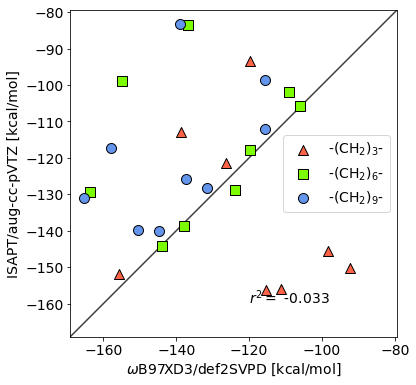

In [9]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 14})

colors=['tomato','lawngreen','cornflowerblue']
legend=['-(CH$_2$)$_3$-','-(CH$_2$)$_6$-',"-(CH$_2$)$_9$-"]
markers=['^','s','o']


fig, ax = plt.subplots(figsize=(6,6))

lb=np.array([0,8,17],dtype=int)
ub=np.array([8,17,26],dtype=int)

for i in range(3):
    xs=benchmark26_NN3.wB97XD3_def2SVPD.values[lb[i]:ub[i]]
    ys=benchmark26_ISAPT.ISAPT.values[lb[i]:ub[i]]
    ax.scatter(xs,ys,c=colors[i],marker=markers[i],edgecolors='black',s=100,alpha=1.0,linewidths=1.0)

plt.legend(legend)   

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

linreg = sc.stats.linregress(benchmark26_NN3.wB97XD3_def2SVPD.values, benchmark26_ISAPT.ISAPT.values)
plt.text(-120,-160, r'$r^2=$ {0:5.3f}'.format(linreg.rvalue), color='k')

plt.xlabel('$\omega$B97XD3/def2SVPD [kcal/mol]')
plt.ylabel('ISAPT/aug-cc-pVTZ [kcal/mol]')
plt.savefig('ISAPT_vs_wB97XD2_NN3.png')  

plt.show()

## Breakdown of benchmark results with terminal group -CH$_2$CH$_2$CH$_3$ for L1, L2 and L3 linkers

In [57]:
ISAPT=pd.read_csv('../csv_files/benchmark26_ISAPT_Psi4_1.1.csv',header=0)
#ISAPT=pd.read_csv('../csv_files/benchmark26_ISAPT_Psi4_1.4_junccpvdz.csv',header=0)
NN=pd.read_csv('../csv_files/benchmark26_term_group_1.csv',header=0)

In [58]:
i=0
f=8
mDLPNO=df(ISAPT.values[i:f,0]-NN.DLPNOCCSDT.values[i:f],columns=[['DLPNO']])
mDFT_SVP=df(ISAPT.values[i:f,0]-NN.wB97XD3_def2SVP.values[i:f],columns=[['wB97XD3_SVP']])
mDFT_TZVP=df(ISAPT.values[i:f,0]-NN.wB97XD3_def2TZVP.values[i:f],columns=[['wB97XD3_TZVP']])
mDFT_SVPD=df(ISAPT.values[i:f,0]-NN.wB97XD3_def2SVPD.values[i:f],columns=[['wB97XD3_SVPD']])
mDFT_TZVPD=df(ISAPT.values[i:f,0]-NN.wB97XD3_def2TZVPD.values[i:f],columns=[['wB97XD3_TZVPD']])

benchmark26=pd.concat([mDLPNO,mDFT_SVP,mDFT_TZVP,mDFT_SVPD,mDFT_TZVPD], axis=1)

pDLPNO=df(np.abs(100*(ISAPT.values[i:f,0]-NN.DLPNOCCSDT.values[i:f])/ISAPT.values[i:f,0]),columns=[['DLPNO']])
pDFT_SVP=df(np.abs(100*(ISAPT.values[i:f,0]-NN.wB97XD3_def2SVP.values[i:f])/ISAPT.values[i:f,0]),columns=[['wB97XD3_SVP']])
pDFT_TZVP=df(np.abs(100*(ISAPT.values[i:f,0]-NN.wB97XD3_def2TZVP.values[i:f])/ISAPT.values[i:f,0]),columns=[['wB97XD3_TZVP']])
pDFT_SVPD=df(np.abs(100*(ISAPT.values[i:f,0]-NN.wB97XD3_def2SVPD.values[i:f])/ISAPT.values[i:f,0]),columns=[['wB97XD3_SVPD']])
pDFT_TZVPD=df(np.abs(100*(ISAPT.values[i:f,0]-NN.wB97XD3_def2TZVPD.values[i:f])/ISAPT.values[i:f,0]),columns=[['wB97XD3_TZVPD']])

benchmark26p=pd.concat([pDLPNO,pDFT_SVP,pDFT_TZVP,pDFT_SVPD,pDFT_TZVPD], axis=1)

mad=np.mean(benchmark26.abs())
std=benchmark26.std(ddof=0)
mpad=np.mean(benchmark26p)
metrics=df()
metrics['MAD-L1']=mad
metrics['STD-L1']=std
metrics['MPAD-L1']=mpad

In [59]:
i=0+8
f=8+9
mDLPNO=df(ISAPT.values[i:f,0]-NN.DLPNOCCSDT.values[i:f],columns=[['DLPNO']])
mDFT_SVP=df(ISAPT.values[i:f,0]-NN.wB97XD3_def2SVP.values[i:f],columns=[['wB97XD3_SVP']])
mDFT_TZVP=df(ISAPT.values[i:f,0]-NN.wB97XD3_def2TZVP.values[i:f],columns=[['wB97XD3_TZVP']])
mDFT_SVPD=df(ISAPT.values[i:f,0]-NN.wB97XD3_def2SVPD.values[i:f],columns=[['wB97XD3_SVPD']])
mDFT_TZVPD=df(ISAPT.values[i:f,0]-NN.wB97XD3_def2TZVPD.values[i:f],columns=[['wB97XD3_TZVPD']])

benchmark26=pd.concat([mDLPNO,mDFT_SVP,mDFT_TZVP,mDFT_SVPD,mDFT_TZVPD], axis=1)

pDLPNO=df(np.abs(100*(ISAPT.values[i:f,0]-NN.DLPNOCCSDT.values[i:f])/ISAPT.values[i:f,0]),columns=[['DLPNO']])
pDFT_SVP=df(np.abs(100*(ISAPT.values[i:f,0]-NN.wB97XD3_def2SVP.values[i:f])/ISAPT.values[i:f,0]),columns=[['wB97XD3_SVP']])
pDFT_TZVP=df(np.abs(100*(ISAPT.values[i:f,0]-NN.wB97XD3_def2TZVP.values[i:f])/ISAPT.values[i:f,0]),columns=[['wB97XD3_TZVP']])
pDFT_SVPD=df(np.abs(100*(ISAPT.values[i:f,0]-NN.wB97XD3_def2SVPD.values[i:f])/ISAPT.values[i:f,0]),columns=[['wB97XD3_SVPD']])
pDFT_TZVPD=df(np.abs(100*(ISAPT.values[i:f,0]-NN.wB97XD3_def2TZVPD.values[i:f])/ISAPT.values[i:f,0]),columns=[['wB97XD3_TZVPD']])

benchmark26p=pd.concat([pDLPNO,pDFT_SVP,pDFT_TZVP,pDFT_SVPD,pDFT_TZVPD], axis=1)

mad=np.mean(benchmark26.abs())
std=benchmark26.std(ddof=0)
mpad=np.mean(benchmark26p)
#metrics_TZVPD2=df()
metrics['MAD-L2']=mad
metrics['STD-L2']=std
metrics['MPAD-L2']=mpad

In [60]:
i=0+8+9
f=8+9+9
mDLPNO=df(ISAPT.values[i:f,0]-NN.DLPNOCCSDT.values[i:f],columns=[['DLPNO']])
mDFT_SVP=df(ISAPT.values[i:f,0]-NN.wB97XD3_def2SVP.values[i:f],columns=[['wB97XD3_SVP']])
mDFT_TZVP=df(ISAPT.values[i:f,0]-NN.wB97XD3_def2TZVP.values[i:f],columns=[['wB97XD3_TZVP']])
mDFT_SVPD=df(ISAPT.values[i:f,0]-NN.wB97XD3_def2SVPD.values[i:f],columns=[['wB97XD3_SVPD']])
mDFT_TZVPD=df(ISAPT.values[i:f,0]-NN.wB97XD3_def2TZVPD.values[i:f],columns=[['wB97XD3_TZVPD']])

benchmark26=pd.concat([mDLPNO,mDFT_SVP,mDFT_TZVP,mDFT_SVPD,mDFT_TZVPD], axis=1)

pDLPNO=df(np.abs(100*(ISAPT.values[i:f,0]-NN.DLPNOCCSDT.values[i:f])/ISAPT.values[i:f,0]),columns=[['DLPNO']])
pDFT_SVP=df(np.abs(100*(ISAPT.values[i:f,0]-NN.wB97XD3_def2SVP.values[i:f])/ISAPT.values[i:f,0]),columns=[['wB97XD3_SVP']])
pDFT_TZVP=df(np.abs(100*(ISAPT.values[i:f,0]-NN.wB97XD3_def2TZVP.values[i:f])/ISAPT.values[i:f,0]),columns=[['wB97XD3_TZVP']])
pDFT_SVPD=df(np.abs(100*(ISAPT.values[i:f,0]-NN.wB97XD3_def2SVPD.values[i:f])/ISAPT.values[i:f,0]),columns=[['wB97XD3_SVPD']])
pDFT_TZVPD=df(np.abs(100*(ISAPT.values[i:f,0]-NN.wB97XD3_def2TZVPD.values[i:f])/ISAPT.values[i:f,0]),columns=[['wB97XD3_TZVPD']])

benchmark26p=pd.concat([pDLPNO,pDFT_SVP,pDFT_TZVP,pDFT_SVPD,pDFT_TZVPD], axis=1)

mad=np.mean(benchmark26.abs())
std=benchmark26.std(ddof=0)
mpad=np.mean(benchmark26p)
#metrics=df()
metrics['MAD-L3']=mad
metrics['STD-L3']=std
metrics['MPAD-L3']=mpad

In [61]:
i=0
f=8+9+9
mDLPNO=df(ISAPT.values[i:f,0]-NN.DLPNOCCSDT.values[i:f],columns=[['DLPNO']])
mDFT_SVP=df(ISAPT.values[i:f,0]-NN.wB97XD3_def2SVP.values[i:f],columns=[['wB97XD3_SVP']])
mDFT_TZVP=df(ISAPT.values[i:f,0]-NN.wB97XD3_def2TZVP.values[i:f],columns=[['wB97XD3_TZVP']])
mDFT_SVPD=df(ISAPT.values[i:f,0]-NN.wB97XD3_def2SVPD.values[i:f],columns=[['wB97XD3_SVPD']])
mDFT_TZVPD=df(ISAPT.values[i:f,0]-NN.wB97XD3_def2TZVPD.values[i:f],columns=[['wB97XD3_TZVPD']])

benchmark26=pd.concat([mDLPNO,mDFT_SVP,mDFT_TZVP,mDFT_SVPD,mDFT_TZVPD], axis=1)

pDLPNO=df(np.abs(100*(ISAPT.values[i:f,0]-NN.DLPNOCCSDT.values[i:f])/ISAPT.values[i:f,0]),columns=[['DLPNO']])
pDFT_SVP=df(np.abs(100*(ISAPT.values[i:f,0]-NN.wB97XD3_def2SVP.values[i:f])/ISAPT.values[i:f,0]),columns=[['wB97XD3_SVP']])
pDFT_TZVP=df(np.abs(100*(ISAPT.values[i:f,0]-NN.wB97XD3_def2TZVP.values[i:f])/ISAPT.values[i:f,0]),columns=[['wB97XD3_TZVP']])
pDFT_SVPD=df(np.abs(100*(ISAPT.values[i:f,0]-NN.wB97XD3_def2SVPD.values[i:f])/ISAPT.values[i:f,0]),columns=[['wB97XD3_SVPD']])
pDFT_TZVPD=df(np.abs(100*(ISAPT.values[i:f,0]-NN.wB97XD3_def2TZVPD.values[i:f])/ISAPT.values[i:f,0]),columns=[['wB97XD3_TZVPD']])

benchmark26p=pd.concat([pDLPNO,pDFT_SVP,pDFT_TZVP,pDFT_SVPD,pDFT_TZVPD], axis=1)

mad=np.mean(benchmark26.abs())
std=benchmark26.std(ddof=0)
mpad=np.mean(benchmark26p)
#metrics=df()
metrics['MAD-all']=mad
metrics['STD-all']=std
metrics['MPAD-all']=mpad
print(metrics)

                  MAD-L1     STD-L1    MPAD-L1     MAD-L2    STD-L2  \
DLPNO          16.082499  10.334850  14.872596   9.523370  6.345837   
wB97XD3_SVP    24.359147  11.090008  21.964101  20.043715  9.277303   
wB97XD3_TZVP   18.159709  10.497811  16.626754  12.375565  7.342746   
wB97XD3_SVPD   15.965609  10.731412  14.716597   9.781178  6.809893   
wB97XD3_TZVPD  16.071649  10.575202  14.912407   9.745563  6.503269   

                 MPAD-L2     MAD-L3    STD-L3    MPAD-L3    MAD-all   STD-all  \
DLPNO           7.075165   9.741644  5.482192   6.893689  11.617120  8.112891   
wB97XD3_SVP    14.892804  21.677590  8.986185  15.435650  21.937112  9.932630   
wB97XD3_TZVP    9.160682  13.362595  6.765574   9.457714  14.496966  8.634106   
wB97XD3_SVPD    7.254612  10.186142  5.823995   7.185915  11.824260  8.395911   
wB97XD3_TZVPD   7.269574  10.139866  5.389075   7.191606  11.828540  8.179234   

                MPAD-all  
DLPNO           9.411556  
wB97XD3_SVP    17.256496  
wB97X

In [62]:
Nmethods=len(metrics)
for imethod in range(Nmethods):
    a=metrics[imethod:imethod+1]
    b=np.array(a)
    Ncols=b.shape[1]
    for icols in range(0,Ncols,3):
        print('{:6.2f} ({:6.2f}) & {:6.2f} &'.format(b[0,icols],b[0,icols+1],b[0,icols+2]),end="")
    print('\n')

 16.08 ( 10.33) &  14.87 &  9.52 (  6.35) &   7.08 &  9.74 (  5.48) &   6.89 & 11.62 (  8.11) &   9.41 &

 24.36 ( 11.09) &  21.96 & 20.04 (  9.28) &  14.89 & 21.68 (  8.99) &  15.44 & 21.94 (  9.93) &  17.26 &

 18.16 ( 10.50) &  16.63 & 12.38 (  7.34) &   9.16 & 13.36 (  6.77) &   9.46 & 14.50 (  8.63) &  11.56 &

 15.97 ( 10.73) &  14.72 &  9.78 (  6.81) &   7.25 & 10.19 (  5.82) &   7.19 & 11.82 (  8.40) &   9.53 &

 16.07 ( 10.58) &  14.91 &  9.75 (  6.50) &   7.27 & 10.14 (  5.39) &   7.19 & 11.83 (  8.18) &   9.59 &



-CH3
```
 16.08 ( 10.33) &  14.87 &  9.52 (  6.35) &   7.08 &  9.74 (  5.48) &   6.89 & 11.62 (  8.11) &   9.41 &
 24.36 ( 11.09) &  21.96 & 20.04 (  9.28) &  14.89 & 21.68 (  8.99) &  15.44 & 21.94 (  9.93) &  17.26 &
 18.16 ( 10.50) &  16.63 & 12.38 (  7.34) &   9.16 & 13.36 (  6.77) &   9.46 & 14.50 (  8.63) &  11.56 &
 15.97 ( 10.73) &  14.72 &  9.78 (  6.81) &   7.25 & 10.19 (  5.82) &   7.19 & 11.82 (  8.40) &   9.53 &
 16.07 ( 10.58) &  14.91 &  9.75 (  6.50) &   7.27 & 10.14 (  5.39) &   7.19 & 11.83 (  8.18) &   9.59 &
```

-CH2CH3
```
 12.34 ( 10.45) &  11.89 &  4.88 (  4.77) &   3.84 &  4.31 (  2.72) &   3.17 &  6.98 (  7.28) &   6.09 &
 17.52 (  9.78) &  16.55 & 12.82 (  5.47) &   9.80 & 14.53 (  3.93) &  10.52 & 14.86 (  6.98) &  12.13 &
 13.04 ( 10.12) &  12.58 &  6.83 (  4.92) &   5.29 &  7.33 (  3.02) &   5.32 &  8.92 (  7.05) &   7.54 &
 12.43 ( 10.55) &  11.89 &  5.41 (  5.19) &   4.21 &  4.83 (  3.25) &   3.52 &  7.37 (  7.40) &   6.33 &
 12.47 ( 10.53) &  12.00 &  5.34 (  5.11) &   4.19 &  4.91 (  2.83) &   3.60 &  7.38 (  7.34) &   6.39 &
```

-CH2CH2CH3
```
 10.93 ( 10.87) &  10.51 &  4.21 (  4.76) &   3.32 &  2.73 (  2.49) &   2.07 &  5.77 (  7.25) &   5.10 &
 13.09 ( 10.02) &  12.79 &  9.48 (  5.08) &   7.30 & 11.41 (  2.91) &   8.29 & 11.26 (  6.70) &   9.33 &
 11.13 ( 10.50) &  10.80 &  4.97 (  4.80) &   3.88 &  4.83 (  2.44) &   3.53 &  6.81 (  6.94) &   5.89 &
 10.71 ( 10.86) &  10.32 &  4.57 (  5.07) &   3.60 &  3.25 (  2.57) &   2.40 &  6.00 (  7.24) &   5.25 &
 10.87 ( 10.88) &  10.47 &  4.55 (  5.05) &   3.59 &  2.97 (  2.52) &   2.22 &  5.95 (  7.26) &   5.23 &
```

junccpvdz

-CH3
```
 19.24 ( 10.35) &  18.39 & 12.64 (  6.40) &   9.75 & 13.73 (  5.32) &  10.15 & 15.05 (  8.06) &  12.55 &
 27.92 ( 11.14) &  26.06 & 23.71 (  9.35) &  18.22 & 25.67 (  8.86) &  18.94 & 25.68 (  9.93) &  20.88 &
 21.72 ( 10.53) &  20.54 & 16.04 (  7.42) &  12.33 & 17.35 (  6.62) &  12.79 & 18.24 (  8.60) &  15.01 &
 19.04 ( 10.76) &  18.16 & 12.89 (  6.89) &   9.93 & 14.17 (  5.66) &  10.45 & 15.23 (  8.36) &  12.64 &
 19.28 ( 10.59) &  18.48 & 12.97 (  6.59) &  10.04 & 14.13 (  5.22) &  10.45 & 15.31 (  8.14) &  12.78 &

```
-CH2CH3
```
 13.98 ( 10.41) &  14.10 &  7.25 (  4.83) &   5.86 &  8.29 (  2.60) &   6.32 &  9.68 (  7.21) &   8.55 &
 21.08 (  9.77) &  20.48 & 16.49 (  5.58) &  13.00 & 18.52 (  3.82) &  13.89 & 18.60 (  6.98) &  15.61 &
 15.83 ( 10.10) &  15.73 &  9.93 (  5.01) &   7.90 & 11.32 (  2.88) &   8.53 & 12.23 (  7.00) &  10.53 &
 14.06 ( 10.51) &  14.09 &  7.83 (  5.27) &   6.29 &  8.81 (  3.11) &   6.67 & 10.09 (  7.35) &   8.82 &
 14.17 ( 10.49) &  14.27 &  7.67 (  5.19) &   6.19 &  8.90 (  2.70) &   6.76 & 10.10 (  7.29) &   8.88 &
```
-CH2CH2CH3
```
 12.30 ( 10.82) &  12.49 &  5.72 (  4.80) &   4.68 &  6.22 (  2.40) &   4.79 &  7.92 (  7.19) &   7.12 &
 16.55 ( 10.00) &  16.52 & 13.15 (  5.22) &  10.43 & 15.39 (  2.83) &  11.59 & 14.97 (  6.71) &  12.70 &
 12.79 ( 10.45) &  12.98 &  7.33 (  4.89) &   5.90 &  8.81 (  2.33) &   6.68 &  9.52 (  6.90) &   8.35 &
 12.33 ( 10.81) &  12.46 &  6.23 (  5.14) &   5.05 &  7.00 (  2.45) &   5.34 &  8.37 (  7.19) &   7.43 &
 12.32 ( 10.82) &  12.50 &  6.12 (  5.12) &   4.98 &  6.77 (  2.42) &   5.19 &  8.25 (  7.21) &   7.37 &
```